# Logistic Regression - Multinomial

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score, roc_curve, roc_auc_score, auc

import warnings
warnings.filterwarnings("ignore") 

In [30]:
# from google.colab import files
# file = files.upload()

In [31]:
# wine_data = pd.read_csv('D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab6 - Logistic Regression/wine.csv') 
# wine_data.head()

import io
# wine_data = pd.read_csv(io.BytesIO(file['wine.csv']))
wine_data = pd.read_csv('wine.csv')
wine_data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
wine_data.shape

(178, 14)

In [33]:
wine_data.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [34]:
wine_data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Wine
2    71
1    59
3    48
Name: count, dtype: int64


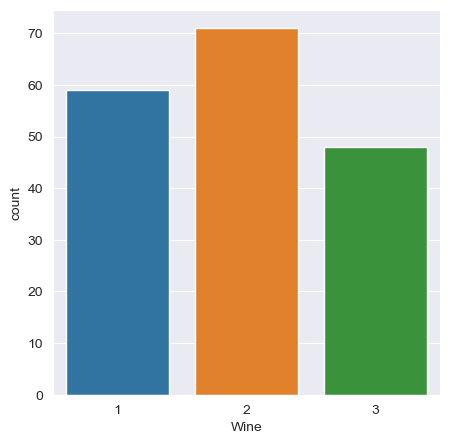

In [35]:
plt.subplots(figsize=(5,5))
sns.countplot(x=wine_data['Wine'])
print(wine_data['Wine'].value_counts())

In [36]:
'''Y = wine_data.loc[:,'Wine'].values
X = wine_data.loc[:,'Alcohol':'Proline'].values'''

X = wine_data[wine_data.columns[1:14]]
Y = wine_data[wine_data.columns[0]]

In [37]:
X.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [38]:
# Split the dataset into a test and training set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

**LR Model with Hyper-Parameter Tuning**

In [39]:
model_LR = LogisticRegression(max_iter=10000)

parameters = dict()
parameters['random_state'] = arange(0, 100, 10) # The seed of the pseudo random number generated which is used while shuffling the data
parameters['C'] = arange(0.01, 100, 10) # Inverse regularization parameter - A control variable that retains strength modification of Regularization by being inversely positioned to the Lambda regulator. C = 1/λ
parameters['solver'] = ['newton-cg', 'lbfgs', 'saga'] # Optimization
parameters['penalty'] = ['l1', 'l2'] # Penalization (Regularization).
parameters['multi_class'] = ['ovr', 'multinomial', 'auto'] # Penalization (Regularization).

## Building Grid Search algorithm with cross-validation and acc score.
grid_search_LR = GridSearchCV(estimator=model_LR, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

## Lastly, finding the best parameters.
grid_search_LR.fit(X_train, y_train)
best_parameters_LR = grid_search_LR.best_params_  
best_score_LR = grid_search_LR.best_score_ 
print()
print(best_parameters_LR)
print(best_score_LR)

y_pred_1 = grid_search_LR.predict(X_test)

# Get the accuracy score
lr_acc = accuracy_score(y_test, y_pred_1)*100
lr_pre = precision_score(y_test, y_pred_1, average='micro')
lr_recall = recall_score(y_test, y_pred_1, average='micro')
lr_f1 = f1_score(y_test, y_pred_1, average='micro')

print("\nLR - Accuracy: {:.3f}.".format(lr_acc))
print("LR - Precision: {:.3f}.".format(lr_pre))
print("LR - Recall: {:.3f}.".format(lr_recall))
print("LR - F1 Score: {:.3f}.".format(lr_f1))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred_1))


{'C': 10.01, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}
0.9652709359605911

LR - Accuracy: 97.222.
LR - Precision: 0.972.
LR - Recall: 0.972.
LR - F1 Score: 0.972.

 Clasification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



In [40]:
# Confusion Matrix
cm_1 = confusion_matrix(y_test, y_pred_1)
print(cm_1)

[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


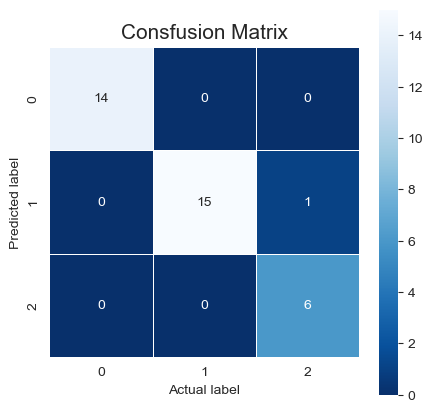

In [41]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_1, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Actual label');
plt.ylabel('Predicted label');
plt.title("Consfusion Matrix", size = 15);

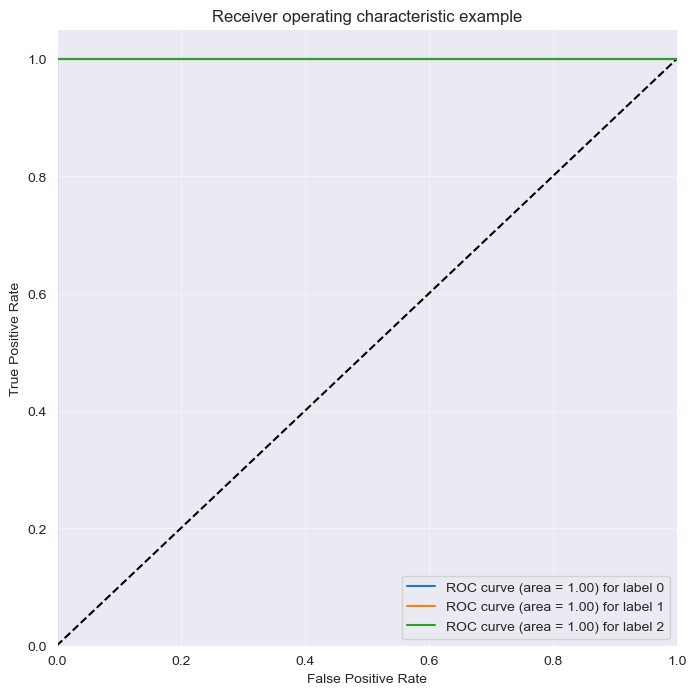

In [42]:
def plot_multiclass_roc(grid_search_LR, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = grid_search_LR.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(grid_search_LR, X_test, y_test, n_classes=3, figsize=(8, 8))

**Class Balancing**

Counter({1: 71, 2: 71, 3: 71})


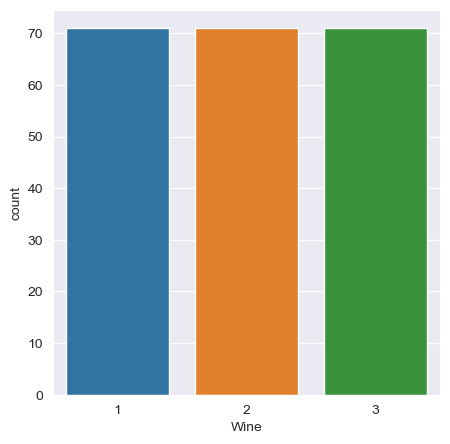

In [43]:
# pip install imbalanced-learn
from collections import Counter
from imblearn.over_sampling import SMOTE
X_b, y_b = SMOTE().fit_resample(X, Y)

plt.subplots(figsize=(5,5))
sns.countplot(x=y_b)
print(Counter(y_b))

In [44]:
# Split the dataset into a test and training set
X_tr, X_te, y_tr, y_te = train_test_split(X_b, y_b, test_size=0.2, random_state=0)

**LR Model with Class Balancing & Hyper-Parameter Tuning - Grid Search**

In [45]:
model_LR = LogisticRegression(max_iter=10000)

parameters = dict()
parameters['random_state'] = arange(0, 100, 1) # The seed of the pseudo random number generated which is used while shuffling the data
parameters['C'] = arange(0.01, 100, 10) # Inverse regularization parameter - A control variable that retains strength modification of Regularization by being inversely positioned to the Lambda regulator. C = 1/λ
parameters['solver'] = ['newton-cg', 'lbfgs', 'saga'] # Optimization
parameters['penalty'] = ['l1', 'l2'] # Penalization (Regularization).
parameters['multi_class'] = ['ovr', 'multinomial', 'auto'] # Penalization (Regularization).


## Building Grid Search algorithm with cross-validation and acc score.
grid_search_LR_2 = GridSearchCV(estimator=model_LR, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

## Lastly, finding the best parameters.
grid_search_LR_2.fit(X_tr, y_tr)
best_parameters_LR_2 = grid_search_LR_2.best_params_  
best_score_LR_2 = grid_search_LR_2.best_score_ 
print()
print(best_parameters_LR_2)
print(best_score_LR_2)

y_pred_2 = grid_search_LR_2.predict(X_te)

# Get the accuracy score
lr_acc_2 = accuracy_score(y_te, y_pred_2)*100
lr_pre_2 = precision_score(y_te, y_pred_2, average='micro')
lr_recall_2 = recall_score(y_te, y_pred_2, average='micro')
lr_f1_2 = f1_score(y_te, y_pred_2, average='micro')

print("\nLR - Accuracy: {:.3f}.".format(lr_acc_2))
print("LR - Precision: {:.3f}.".format(lr_pre_2))
print("LR - Recall: {:.3f}.".format(lr_recall_2))
print("LR - F1 Score: {:.3f}.".format(lr_f1_2))
print ('\n Clasification Report:\n', classification_report(y_te,y_pred_2))

/Users/teohkhenghong/mambaforge/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/teohkhenghong/mambaforge/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod


{'C': 10.01, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}
0.9411764705882353

LR - Accuracy: 97.674.
LR - Precision: 0.977.
LR - Recall: 0.977.
LR - F1 Score: 0.977.

 Clasification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.92      0.96        13
           3       0.95      1.00      0.97        19

    accuracy                           0.98        43
   macro avg       0.98      0.97      0.98        43
weighted avg       0.98      0.98      0.98        43



In [46]:
# Confusion Matrix
cm_2 = confusion_matrix(y_te, y_pred_2)
print(cm_2)

[[11  0  0]
 [ 0 12  1]
 [ 0  0 19]]


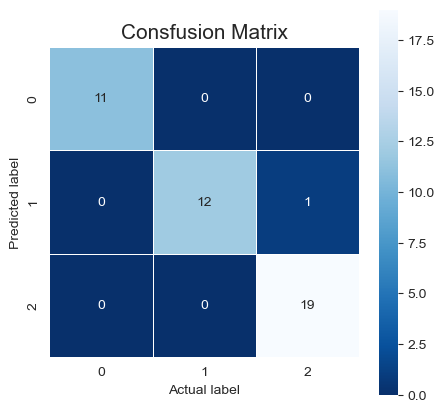

In [47]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm_2, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Actual label');
plt.ylabel('Predicted label');
plt.title("Consfusion Matrix", size = 15);

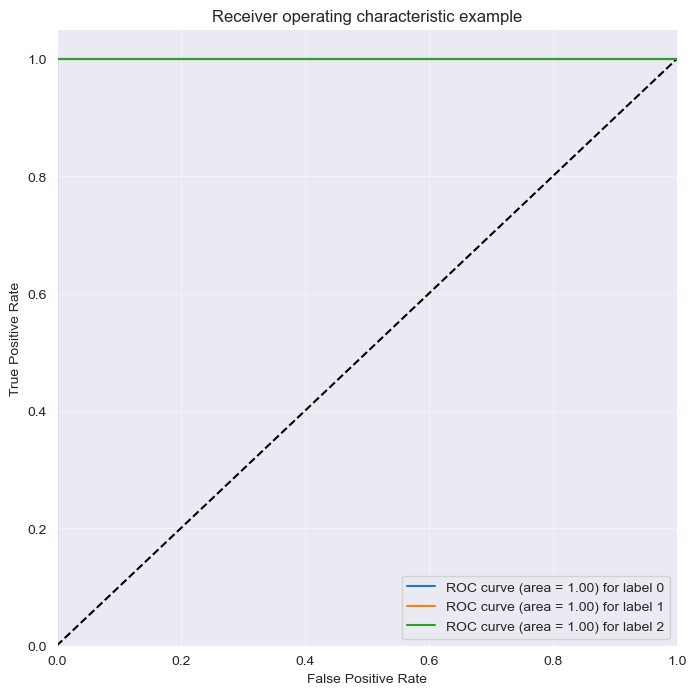

In [48]:
def plot_multiclass_roc(grid_search_LR_2, X_te, y_te, n_classes, figsize=(8,8)):
    y_score_2 = grid_search_LR_2.decision_function(X_te)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_te_dummies = pd.get_dummies(y_te, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_te_dummies[:, i], y_score_2[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(grid_search_LR_2, X_te, y_te, n_classes=3, figsize=(8,8))

**Random Search**

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.

In [49]:
from sklearn.model_selection import RandomizedSearchCV

model_LR = LogisticRegression(max_iter=10000)

parameters = dict()
parameters['random_state'] = arange(0, 100, 1) # The seed of the pseudo random number generated which is used while shuffling the data
parameters['C'] = arange(0.01, 100, 10) # Inverse regularization parameter - A control variable that retains strength modification of Regularization by being inversely positioned to the Lambda regulator. C = 1/λ
parameters['solver'] = ['newton-cg', 'lbfgs', 'saga'] # Optimization
parameters['penalty'] = ['l1', 'l2'] # Penalization (Regularization).
parameters['multi_class'] = ['ovr', 'multinomial', 'auto'] # Penalization (Regularization).


## Building Grid Search algorithm with cross-validation and acc score.
rand_search_LR_2 = RandomizedSearchCV(model_LR, parameters, scoring='accuracy', cv=5, n_jobs=-1)

## Lastly, finding the best parameters.
rand_search_LR_2.fit(X_tr, y_tr)
best_parameters_LR_3 = rand_search_LR_2.best_params_  
best_score_LR_3 = rand_search_LR_2.best_score_ 
print()
print(best_parameters_LR_3)
print(best_score_LR_3)

y_pred_3 = rand_search_LR_2.predict(X_te)

# Get the accuracy score
lr_acc_3 = accuracy_score(y_te, y_pred_3)*100
lr_pre_3 = precision_score(y_te, y_pred_3, average='micro')
lr_recall_3 = recall_score(y_te, y_pred_3, average='micro')
lr_f1_3 = f1_score(y_te, y_pred_3, average='micro')

print("\nLR - Accuracy: {:.3f}.".format(lr_acc_3))
print("LR - Precision: {:.3f}.".format(lr_pre_3))
print("LR - Recall: {:.3f}.".format(lr_recall_3))
print("LR - F1 Score: {:.3f}.".format(lr_f1_3))
print ('\n Clasification Report:\n', classification_report(y_te,y_pred_3))


{'solver': 'newton-cg', 'random_state': 52, 'penalty': 'l2', 'multi_class': 'ovr', 'C': 40.01}
0.9411764705882353

LR - Accuracy: 97.674.
LR - Precision: 0.977.
LR - Recall: 0.977.
LR - F1 Score: 0.977.

 Clasification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.92      0.96        13
           3       0.95      1.00      0.97        19

    accuracy                           0.98        43
   macro avg       0.98      0.97      0.98        43
weighted avg       0.98      0.98      0.98        43



In [50]:
# Confusion Matrix
cm_3 = confusion_matrix(y_te, y_pred_3)
print(cm_3)

[[11  0  0]
 [ 0 12  1]
 [ 0  0 19]]


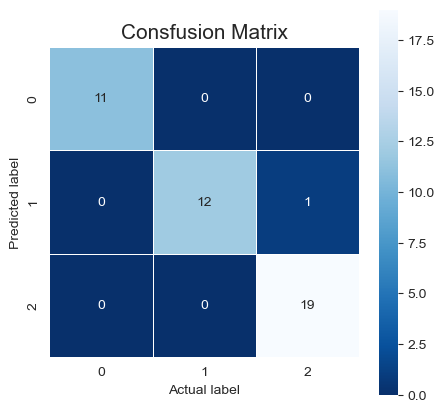

In [51]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm_3, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Actual label');
plt.ylabel('Predicted label');
plt.title("Consfusion Matrix", size = 15);